In [1]:
import quantileRegression as QReg

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tables
import pandas as pd
from joblib import Parallel, delayed
reload(QReg)

Welcome to ROOTaaS 6.06/05


<module 'quantileRegression' from '/mnt/t3nfs01/data01/shome/threiten/QReg/dataMC-1/MTR/quantileRegression.pyc'>

In [2]:
quantiles = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
workDir = "/mnt/t3nfs01/data01/shome/threiten/QReg/ReReco16"
#Y="probeR9"
startEvt=0
stopEvt=-1
cols=['probePt', 'probePhi', 'probeScEta', 'rho', 'weight', 'run', 'probeR9', 'probeS4', 'probeEtaWidth', 'probePhiWidth', 'probeSigmaIeIe', 'probeCovarianceIetaIphi','probeCovarianceIphiIphi']
qr_data_EB=QReg.quantileRegression('data')
qr_data_EB.loadDFh5(workDir + "/df_data_All.h5",startEvt,stopEvt, 12345, False, cols)
qr_mc_EB=QReg.quantileRegression('mc')
qr_mc_EB.loadDFh5(workDir + "/df_mc_All.h5",startEvt,stopEvt, 12345, False, cols)
qr_data_EE=QReg.quantileRegression('data')
qr_data_EE.loadDFh5(workDir + "/df_data_All.h5",startEvt,stopEvt, 12345, False, cols)
qr_mc_EE=QReg.quantileRegression('mc')
qr_mc_EE.loadDFh5(workDir + "/df_mc_All.h5",startEvt,stopEvt, 12345, False, cols)

Loading dataframe from :  /mnt/t3nfs01/data01/shome/threiten/QReg/ReReco16/df_data_All.h5
Selecting events   [ 0 ,  8745918 ]  out of  8745918
number of events: 8745918
Loading dataframe from :  /mnt/t3nfs01/data01/shome/threiten/QReg/ReReco16/df_mc_All.h5
Selecting events   [ 0 ,  3608033 ]  out of  3608033
number of events: 3608033
Loading dataframe from :  /mnt/t3nfs01/data01/shome/threiten/QReg/ReReco16/df_data_All.h5
Selecting events   [ 0 ,  8745918 ]  out of  8745918
number of events: 8745918
Loading dataframe from :  /mnt/t3nfs01/data01/shome/threiten/QReg/ReReco16/df_mc_All.h5
Selecting events   [ 0 ,  3608033 ]  out of  3608033
number of events: 3608033


In [4]:
qr_data_EB.applyCutsToDF('probeScEta',-1.4442,1.4442,'inside')
qr_mc_EB.applyCutsToDF('probeScEta',-1.4442,1.4442,'inside')
qr_data_EE.applyCutsToDF('probeScEta',-1.4442,1.4442,'outside')
qr_mc_EE.applyCutsToDF('probeScEta',-1.4442,1.4442,'outside')

-1.4442  <  probeScEta  and  probeScEta  <  1.4442
-1.4442  <  probeScEta  and  probeScEta  <  1.4442
probeScEta  <  -1.4442  or  1.4442  <  probeScEta
probeScEta  <  -1.4442  or  1.4442  <  probeScEta


In [8]:
def correctY(qReg,var,quantiles,EBEE,n_jobs):
    qReg.loadDataWeights(workDir + "/weights/data_weights_" + EBEE,var,quantiles)
    qReg.loadMcWeights(workDir + "/weights/mc_weights_" + EBEE,var,quantiles)
    
    x = ['probePt', 'probeScEta', 'probePhi', 'rho']
    y = var

        #print "Get corrections for ", y, " with quantiles ", quantiles

        # quantile regressions features                                                                    
    X = qReg.df.loc[:,x].values
        # target e.g. y = "R9"                                                                             
    Y = qReg.df[y]
    print "Features: X = ", x, " target y = ", y
        # print X, Y                                                                                       

    Y = Y.values.reshape(-1,1)
    Z = np.hstack([X,Y])

    Y_corr = np.concatenate(Parallel(n_jobs=n_jobs,verbose=20)(delayed(QReg.applyCorrection)(qReg.mcclf,qReg.dataclf,ch[:,:-1],ch[:,-1]) for ch in np.array_split(Z,n_jobs)))
    qReg.df[y+"_corr"] = Y_corr

In [12]:
varrs = ['probeR9', 'probeS4', 'probeEtaWidth', 'probePhiWidth', 'probeSigmaIeIe']
for var in varrs:
    correctY(qr_mc_EB,var,quantiles,'EB',20)
    correctY(qr_mc_EE,var,quantiles,'EE',10)

Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeR9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   23.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   30.6s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeR9


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.1s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.6s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.1s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.4s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.0s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.2s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.5s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.9s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.3s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    9.3s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeS4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   22.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   36.4s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeS4


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.0s remaining:   -0.5s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.4s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.8s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.2s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.6s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.0s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.4s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.8s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.1s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    9.1s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeEtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   20.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   29.3s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeEtaWidth


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.5s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.8s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.1s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.3s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.0s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.1s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.8s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.2s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.6s remaining:   -0.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    9.6s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probePhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   22.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   30.7s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probePhiWidth


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    5.9s remaining:   -0.5s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.4s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.9s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.5s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.0s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.7s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.1s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.4s remaining:   -0.9s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.8s remaining:   -0.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    9.8s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeSigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   19.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   28.5s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeSigmaIeIe


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    6.6s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.0s remaining:   -0.6s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.4s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    7.8s remaining:   -0.7s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.3s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.6s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    8.9s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.3s remaining:   -0.8s
[Parallel(n_jobs=10)]: Done  11 out of  10 | elapsed:    9.6s remaining:   -0.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    9.6s finished


In [16]:
varrs = ['probeR9', 'probeS4', 'probeEtaWidth', 'probePhiWidth', 'probeSigmaIeIe']
n_jobs=20

for var in varrs:
    
    qr_mc_EB.loadDataWeights(workDir + "/weights/data_weights_EB",var,quantiles)
    qr_mc_EB.loadMcWeights(workDir + "/weights/mc_weights_EB",var,quantiles)
    
    x = ['probePt', 'probeScEta', 'probePhi', 'rho']
    y = var

        #print "Get corrections for ", y, " with quantiles ", quantiles

        # quantile regressions features                                                                    
    X    = qr_mc_EB.df.loc[:,x].values
        # target e.g. y = "R9"                                                                             
    Y    = qr_mc_EB.df[y]
    print "Features: X = ", x, " target y = ", y
        # print X, Y                                                                                       

    Y = Y.values.reshape(-1,1)
    Z = np.hstack([X,Y])

    Y_corr = np.concatenate(Parallel(n_jobs=n_jobs,verbose=20)(delayed(QReg.applyCorrection)(qr_mc_EB.mcclf,qr_mc_EB.dataclf,ch[:,:-1],ch[:,-1]) for ch in np.array_split(Z,n_jobs)))
    qr_mc_EB.df[y+"_corr"] = Y_corr

Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeR9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   13.3s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeS4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   10.6s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeEtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   14.8s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probePhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    9.8s finished


Features: X =  ['probePt', 'probeScEta', 'probePhi', 'rho']  target y =  probeSigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   14.7s finished


In [20]:
def percentiles(gob,centers,var,weightst=None,which=[.5,.25,.75,.1,.9],nq=30):
    if 'probeS4' in var:
        binsq = np.linspace(0,2,200001)
    if 'probeR9' in var:
        binsq = np.linspace(0,2,200001)
    if 'probeEtaWidth' in var: 
        binsq = np.linspace(0,.1,200001)
    if 'probePhiWidth' in var: 
        binsq = np.linspace(0,.5,200001)
    if 'probeSigmaIeIe' in var:
        binsq = np.linspace(0,.1,400001)
    if 'newPhoID' in var:
        binsq = np.linspace(-1,1,200001)
    
    if weightst!=None:
        return np.vstack([wquantile(which,gob[var].get_group(i), bins=binsq, weights=gob[weightst].get_group(i)) for i in np.arange(nq)])
    else:
        return np.vstack([wquantile(which,gob[var].get_group(i), bins=binsq) for i in np.arange(nq)])
    
    
def mk_profile(gb_mc,gb_data,centers,var,name,title,
               xlabel='',
               ylabel='',
               ylim=[0.75,1],
               legloc='best',
               nq=30,
               **kwargs):

    plt.figure(figsize=(6,5))

#     pred_mean = gb['pred_'+var].mean().values
#     pred_std = gb['pred_'+var].std()

#     reco_mean = gb['reco_'+var].mean().values
#     reco_std = gb['reco_'+var].std()

#     plt.plot(centers,pred_mean,'o-',markersize=7,color='darkblue',label='reco')
#     plt.fill_between(centers,pred_mean - 0.5*pred_std, pred_mean + 0.5*pred_std, color='darkblue',alpha=0.2)

#     plt.plot(centers,reco_mean,'o-',markersize=7,color='red',label='gen')
#     plt.fill_between(centers,reco_mean - 0.5*reco_std, pred_mean + 0.5*reco_std, color='red',alpha=0.2)
    
    
    
    if 'newPhoID' in var:
        
        data_quantiles = percentiles(gb_data, centers,var,nq=nq)
        mc_quantiles = percentiles(gb_mc,centers,var,'weight',nq=nq)
        mc_c_quantiles = percentiles(gb_mc,centers,var+'corrShowerShapes','weight',nq=nq)
        
        plt.plot(centers,data_quantiles[:,0],'-',markersize=0,color='darkblue',label='data')
        plt.fill_between(centers,data_quantiles[:,1], data_quantiles[:,2], color='darkblue',alpha=0.3)
        plt.plot(centers,data_quantiles[:,3],'--',linewidth=1.5,color='darkblue')
        plt.plot(centers,data_quantiles[:,4],'--',linewidth=1.5,color='darkblue')

        plt.plot(centers,mc_quantiles[:,0],'-',markersize=0,color='red',label='mc_uncorr')
        plt.fill_between(centers,mc_quantiles[:,1], mc_quantiles[:,2], color='red',alpha=0.2)
        plt.plot(centers,mc_quantiles[:,3],'--',linewidth=1.5,color='red')
        plt.plot(centers,mc_quantiles[:,4],'--',linewidth=1.5,color='red')
    
        plt.plot(centers,mc_c_quantiles[:,0],'-',markersize=0,color='green',label='mc_corr')
        plt.fill_between(centers,mc_c_quantiles[:,1], mc_c_quantiles[:,2], color='green',alpha=0.2)
        plt.plot(centers,mc_c_quantiles[:,3],'--',linewidth=1.5,color='green')
        plt.plot(centers,mc_c_quantiles[:,4],'--',linewidth=1.5,color='green')
        
    else:
        
        data_quantiles = percentiles(gb_data, centers, var,nq=nq)
        mc_quantiles = percentiles(gb_mc,centers,var,'weight',nq=nq)
        mc_c_quantiles = percentiles(gb_mc,centers,var+'_corr','weight',nq=nq)

        plt.plot(centers,data_quantiles[:,0],'-',markersize=0,color='darkblue',label='data')
        plt.fill_between(centers,data_quantiles[:,1], data_quantiles[:,2], color='darkblue',alpha=0.3)
        plt.plot(centers,data_quantiles[:,3],'--',linewidth=1.5,color='darkblue')
        plt.plot(centers,data_quantiles[:,4],'--',linewidth=1.5,color='darkblue')

        plt.plot(centers,mc_quantiles[:,0],'-',markersize=0,color='red',label='mc_uncorr')
        plt.fill_between(centers,mc_quantiles[:,1], mc_quantiles[:,2], color='red',alpha=0.2)
        plt.plot(centers,mc_quantiles[:,3],'--',linewidth=1.5,color='red')
        plt.plot(centers,mc_quantiles[:,4],'--',linewidth=1.5,color='red')
    
        plt.plot(centers,mc_c_quantiles[:,0],'-',markersize=0,color='green',label='mc_corr')
        plt.fill_between(centers,mc_c_quantiles[:,1], mc_c_quantiles[:,2], color='green',alpha=0.2)
        plt.plot(centers,mc_c_quantiles[:,3],'--',linewidth=1.5,color='green')
        plt.plot(centers,mc_c_quantiles[:,4],'--',linewidth=1.5,color='green')
    
    plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)
    plt.legend(loc=legloc)
    plt.savefig(name+'.png',bbox_inches='tight')
    plt.savefig(name+'.pdf',bbox_inches='tight')
    plt.show()

In [14]:
def wquantile(q,vals,bins,weights=None):
    centres=0.5*(bins[1:]+bins[:-1])
    hist, _ = np.histogram(vals,bins=bins,weights=weights)
    cum_hist = np.cumsum(hist,dtype=float)
    cum_hist_n = cum_hist/cum_hist[-1]
    ind_high_bound = np.searchsorted(cum_hist_n,q)
    ind_low_bound = ind_high_bound-1
    inds=np.sort(np.ravel(np.array([ind_low_bound,ind_high_bound])))
    q_vals = np.interp(q,cum_hist_n[inds],centres[inds])
    return q_vals

In [155]:
pt_bins=np.array([25,30,35,40,45,50,55,60,65,70,75,80,100])
pt_centres = 0.5*(pt_bins[1:]+pt_bins[:-1])
eta_bins_EB=np.array([-1.4442,-1.25,-1.,-0.75,-.5,-0.25,0,0.25,.5,0.75,1.,1.25,1.4442])# -2.5,-2.25,-2,-1.4442,1.4442,2,2.25,2.5
eta_centres_EB = 0.5*(eta_bins_EB[1:]+eta_bins_EB[:-1])
eta_bins_EE=np.array([-2.5,-2.25,-2,-1.4442,1.4442,2,2.25,2.5])
eta_centres_EE = 0.5*(eta_bins_EE[1:]+eta_bins_EE[:-1])
#eta_centres_EE = np.delete(eta_centres_EE,3)
phi_bins = np.array([-3.141,-2.5,-2.,-1.5,-1.,-0.5,0,0.5,1.,1.5,2.,2.5,3.141])
phi_centres = 0.5*(phi_bins[1:]+phi_bins[:-1])
rho_bins = np.array([.5,5,10,15,20,25,30,35,40,45,50,55,60,75])
rho_centres = 0.5*(rho_bins[1:]+rho_bins[:-1])

In [156]:
qr_data_EB.df['pt_bin']=pd.cut(qr_data_EB.df['probePt'],bins=pt_bins,labels=pt_centres)
qr_mc_EB.df['pt_bin']=pd.cut(qr_mc_EB.df['probePt'],bins=pt_bins,labels=pt_centres)
qr_data_EB.df['eta_bin']=pd.cut(qr_data_EB.df['probeScEta'],bins=eta_bins_EB,labels=eta_centres_EB)
qr_mc_EB.df['eta_bin']=pd.cut(qr_mc_EB.df['probeScEta'],bins=eta_bins_EB,labels=eta_centres_EB)
qr_data_EB.df['phi_bin']=pd.cut(qr_data_EB.df['probePhi'],bins=phi_bins,labels=phi_centres)
qr_mc_EB.df['phi_bin']=pd.cut(qr_mc_EB.df['probePhi'],bins=phi_bins,labels=phi_centres)
qr_data_EB.df['rho_bin']=pd.cut(qr_data_EB.df['rho'],bins=rho_bins,labels=rho_centres)
qr_mc_EB.df['rho_bin']=pd.cut(qr_mc_EB.df['rho'],bins=rho_bins,labels=rho_centres)

In [ ]:
qr_data_EE.df['pt_bin']=pd.cut(qr_data_EE.df['probePt'],bins=pt_bins,labels=pt_centres)
qr_mc_EE.df['pt_bin']=pd.cut(qr_mc_EE.df['probePt'],bins=pt_bins,labels=pt_centres)
qr_data_EE.df['eta_bin']=pd.cut(qr_data_EE.df['probeScEta'],bins=eta_bins_EE,labels=eta_centres_EE)
qr_mc_EE.df['eta_bin']=pd.cut(qr_mc_EE.df['probeScEta'],bins=eta_bins_EE,labels=eta_centres_EE)
qr_data_EE.df['phi_bin']=pd.cut(qr_data_EE.df['probePhi'],bins=phi_bins,labels=phi_centres)
qr_mc_EE.df['phi_bin']=pd.cut(qr_mc_EE.df['probePhi'],bins=phi_bins,labels=phi_centres)
qr_data_EE.df['rho_bin']=pd.cut(qr_data_EE.df['rho'],bins=rho_bins,labels=rho_centres)
qr_mc_EE.df['rho_bin']=pd.cut(qr_mc_EE.df['rho'],bins=rho_bins,labels=rho_centres)

In [25]:
nq=60
qr_data_EB.df['pt_bin'],pt_bins_EB=pd.qcut(qr_data_EB.df['probePt'],nq,labels=np.arange(nq),retbins=True)
pt_centres_EB = 0.5*(pt_bins_EB[1:]+pt_bins_EB[:-1])
qr_mc_EB.df['pt_bin']=pd.cut(qr_mc_EB.df['probePt'],bins=pt_bins_EB,labels=np.arange(nq))

qr_data_EB.df['eta_bin'],eta_bins_EB=pd.qcut(qr_data_EB.df['probeScEta'],nq,labels=np.arange(nq),retbins=True)
eta_centres_EB = 0.5*(eta_bins_EB[1:]+eta_bins_EB[:-1])
qr_mc_EB.df['eta_bin']=pd.cut(qr_mc_EB.df['probeScEta'],bins=eta_bins_EB,labels=np.arange(nq))

qr_data_EB.df['phi_bin'],phi_bins_EB=pd.qcut(qr_data_EB.df['probePhi'],nq,labels=np.arange(nq),retbins=True)
phi_centres_EB = 0.5*(phi_bins_EB[1:]+phi_bins_EB[:-1])
qr_mc_EB.df['phi_bin']=pd.cut(qr_mc_EB.df['probePhi'],bins=phi_bins_EB,labels=np.arange(nq))

qr_data_EB.df['rho_bin'],rho_bins_EB=pd.qcut(qr_data_EB.df['rho'],nq,labels=np.arange(nq),retbins=True)
rho_centres_EB = 0.5*(rho_bins_EB[1:]+rho_bins_EB[:-1])
qr_mc_EB.df['rho_bin']=pd.cut(qr_mc_EB.df['rho'],bins=rho_bins_EB,labels=np.arange(nq))

In [26]:
qr_data_EE.df['pt_bin'],pt_bins_EE=pd.qcut(qr_data_EE.df['probePt'],nq,labels=np.arange(nq),retbins=True)
pt_centres_EE = 0.5*(pt_bins_EE[1:]+pt_bins_EE[:-1])
qr_mc_EE.df['pt_bin']=pd.cut(qr_mc_EE.df['probePt'],bins=pt_bins_EE,labels=np.arange(nq))

qr_data_EE.df['eta_bin'],eta_bins_EE=pd.qcut(qr_data_EE.df['probeScEta'],nq,labels=np.arange(nq),retbins=True)
eta_centres_EE = 0.5*(eta_bins_EE[1:]+eta_bins_EE[:-1])
qr_mc_EE.df['eta_bin']=pd.cut(qr_mc_EE.df['probeScEta'],bins=eta_bins_EE,labels=np.arange(nq))

qr_data_EE.df['phi_bin'],phi_bins_EE=pd.qcut(qr_data_EE.df['probePhi'],nq,labels=np.arange(nq),retbins=True)
phi_centres_EE = 0.5*(phi_bins_EE[1:]+phi_bins_EE[:-1])
qr_mc_EE.df['phi_bin']=pd.cut(qr_mc_EE.df['probePhi'],bins=phi_bins_EE,labels=np.arange(nq))

qr_data_EE.df['rho_bin'],rho_bins_EE=pd.qcut(qr_data_EE.df['rho'],nq,labels=np.arange(nq),retbins=True)
rho_centres_EE = 0.5*(rho_bins_EE[1:]+rho_bins_EE[:-1])
qr_mc_EE.df['rho_bin']=pd.cut(qr_mc_EE.df['rho'],bins=rho_bins_EE,labels=np.arange(nq))

In [27]:
pt_data_EB=qr_data_EB.df.groupby('pt_bin')
pt_mc_EB=qr_mc_EB.df.groupby('pt_bin')
eta_data_EB=qr_data_EB.df.groupby('eta_bin')
eta_mc_EB=qr_mc_EB.df.groupby('eta_bin')
phi_data_EB=qr_data_EB.df.groupby('phi_bin')
phi_mc_EB=qr_mc_EB.df.groupby('phi_bin')
rho_data_EB=qr_data_EB.df.groupby('rho_bin')
rho_mc_EB=qr_mc_EB.df.groupby('rho_bin')
#print pt_bins.shape[0], pt_centres.shape[0]

In [28]:
pt_data_EE=qr_data_EE.df.groupby('pt_bin')
pt_mc_EE=qr_mc_EE.df.groupby('pt_bin')
eta_data_EE=qr_data_EE.df.groupby('eta_bin')
eta_mc_EE=qr_mc_EE.df.groupby('eta_bin')
phi_data_EE=qr_data_EE.df.groupby('phi_bin')
phi_mc_EE=qr_mc_EE.df.groupby('phi_bin')
rho_data_EE=qr_data_EE.df.groupby('rho_bin')
rho_mc_EE=qr_mc_EE.df.groupby('rho_bin')

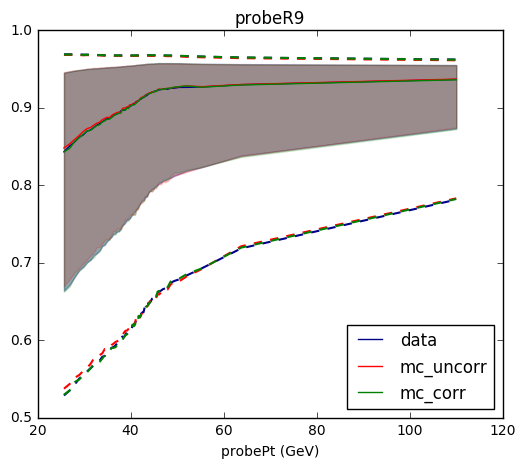

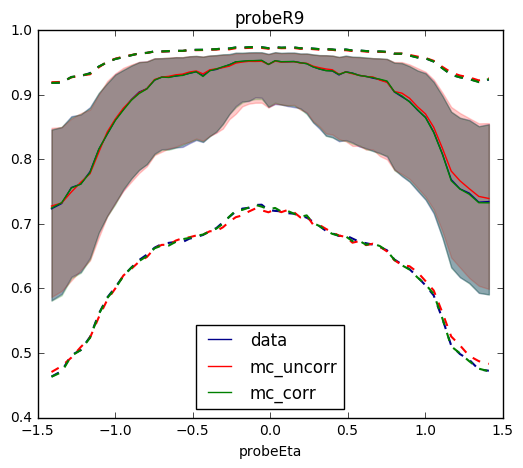

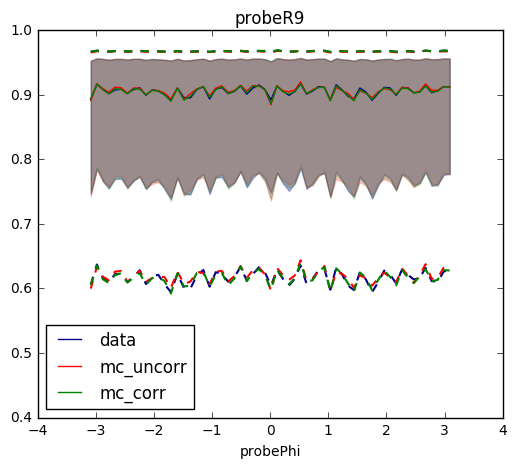

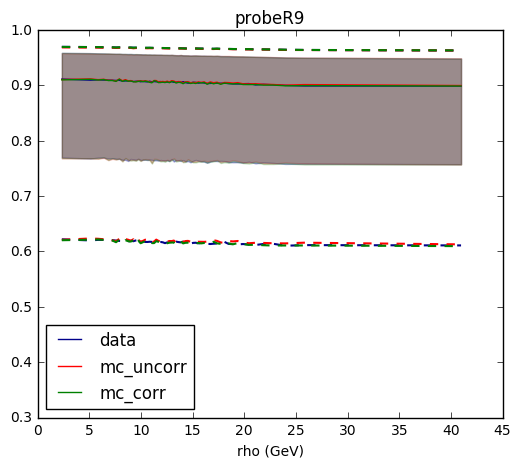

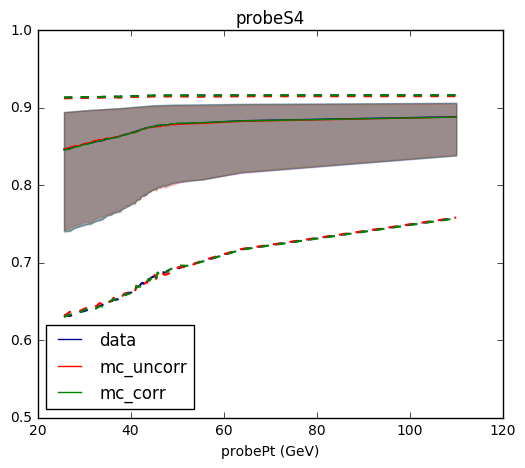

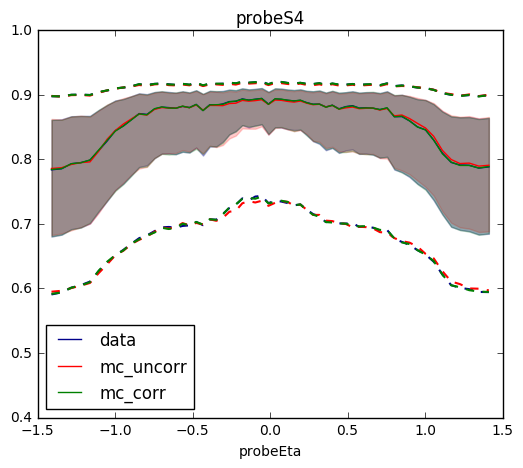

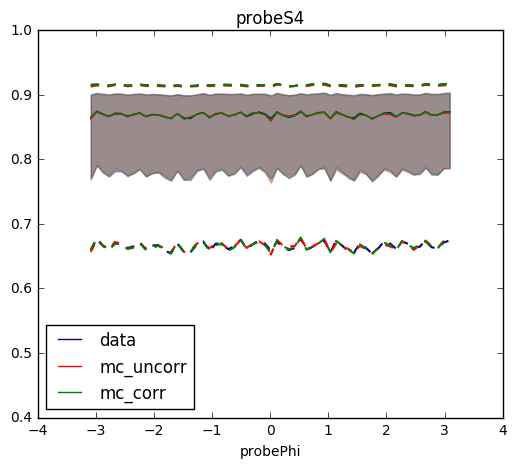

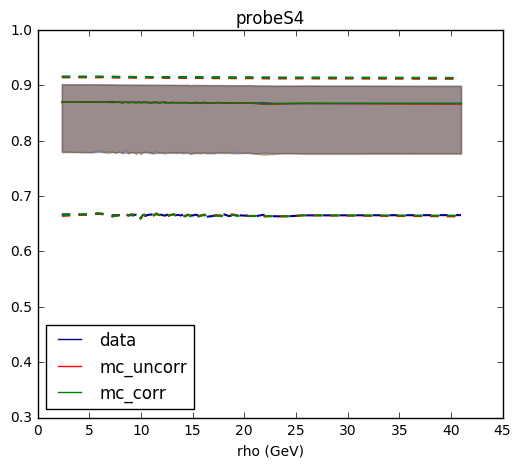

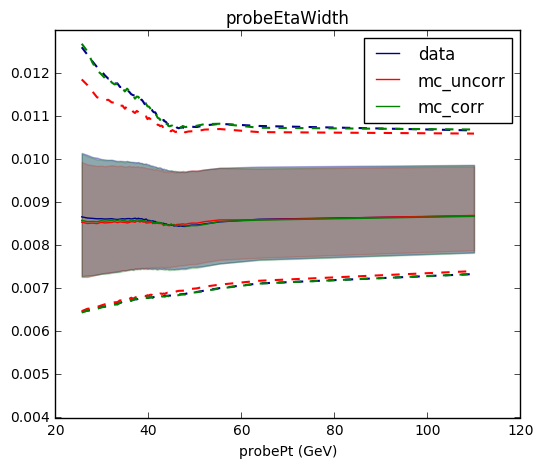

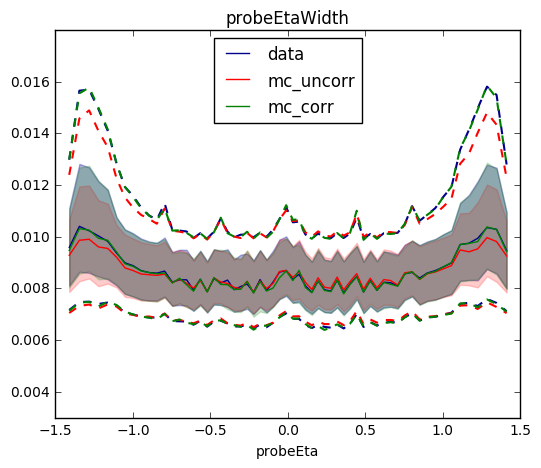

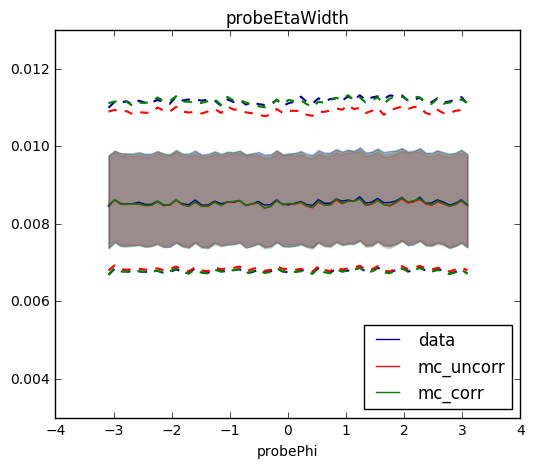

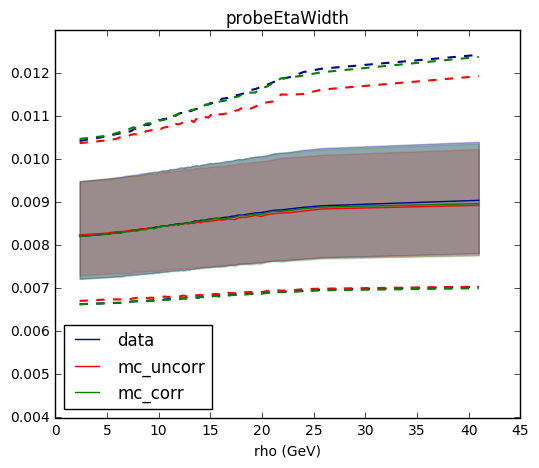

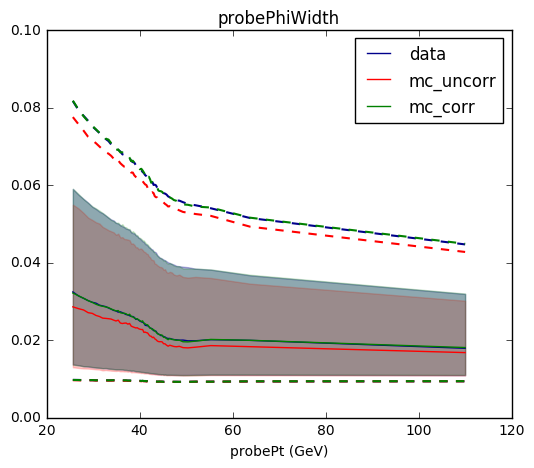

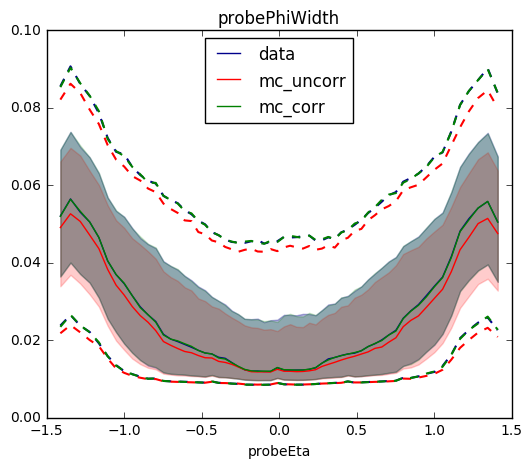

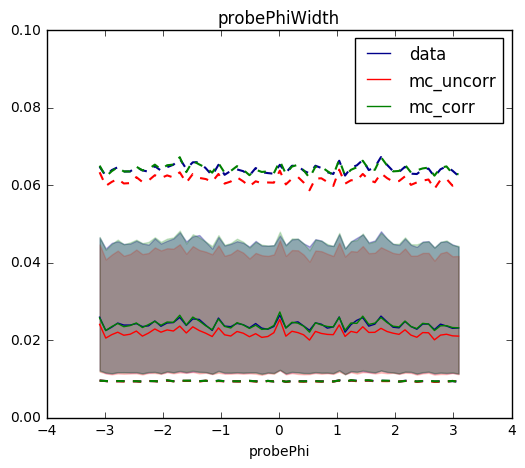

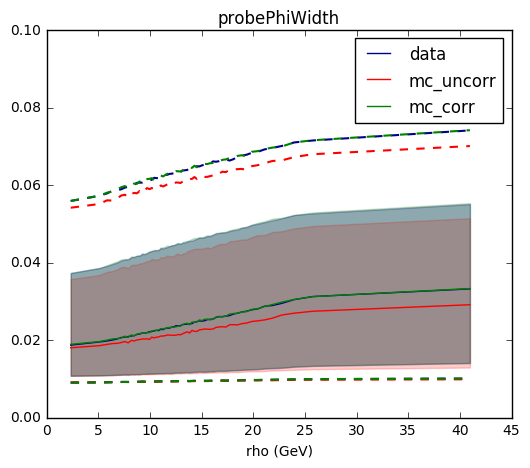

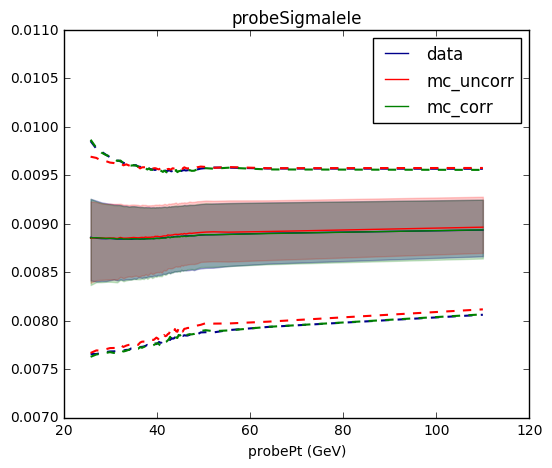

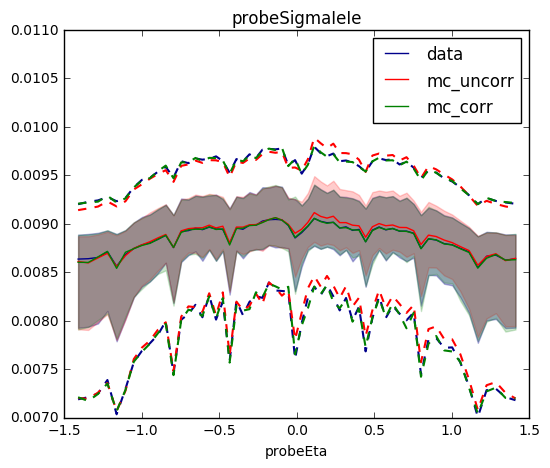

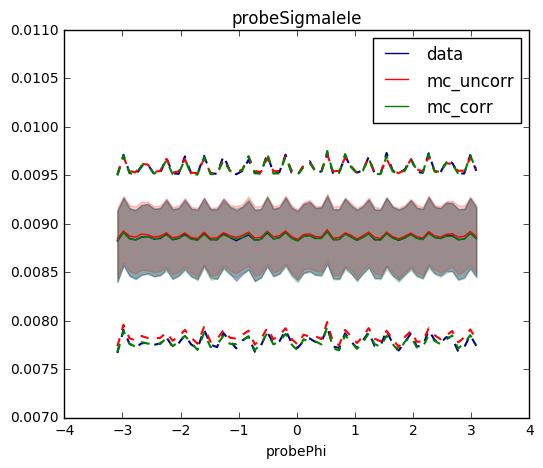

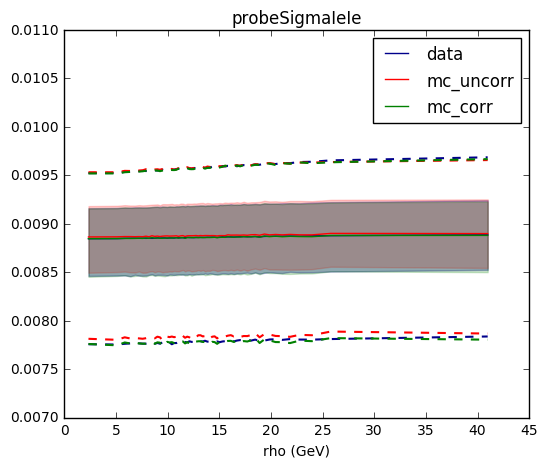

In [30]:
mk_profile(pt_mc_EB,pt_data_EB,pt_centres_EB,'probeR9',workDir+'/plots/profile_pt_probeR9_EB','probeR9',xlabel='probePt (GeV)', ylim=[.5,1], nq=nq)
mk_profile(eta_mc_EB,eta_data_EB,eta_centres_EB,'probeR9',workDir+'/plots/profile_eta_probeR9_EB','probeR9',xlabel='probeEta',ylim=[.4,1], nq=nq)
mk_profile(phi_mc_EB,phi_data_EB,phi_centres_EB,'probeR9',workDir+'/plots/profile_phi_probeR9_EB','probeR9',xlabel='probePhi',ylim=[.4,1], nq=nq)
mk_profile(rho_mc_EB,rho_data_EB,rho_centres_EB,'probeR9',workDir+'/plots/profile_rho_probeR9_EB','probeR9',xlabel='rho (GeV)',ylim=[.3,1],legloc='lower left', nq=nq)
mk_profile(pt_mc_EB,pt_data_EB,pt_centres_EB,'probeS4',workDir+'/plots/profile_pt_probeS4_EB','probeS4',xlabel='probePt (GeV)', ylim=[.5,1], nq=nq)
mk_profile(eta_mc_EB,eta_data_EB,eta_centres_EB,'probeS4',workDir+'/plots/profile_eta_probeS4_EB','probeS4',xlabel='probeEta',ylim=[.4,1], nq=nq)
mk_profile(phi_mc_EB,phi_data_EB,phi_centres_EB,'probeS4',workDir+'/plots/profile_phi_probeS4_EB','probeS4',xlabel='probePhi',ylim=[.4,1],nq=nq)
mk_profile(rho_mc_EB,rho_data_EB,rho_centres_EB,'probeS4',workDir+'/plots/profile_rho_probeS4_EB','probeS4',xlabel='rho (GeV)',ylim=[.3,1],legloc='lower left',nq=nq)
mk_profile(pt_mc_EB,pt_data_EB,pt_centres_EB,'probeEtaWidth',workDir+'/plots/profile_pt_probeEtaWidth_EB','probeEtaWidth',xlabel='probePt (GeV)', ylim=[0.004,.013],nq=nq)
mk_profile(eta_mc_EB,eta_data_EB,eta_centres_EB,'probeEtaWidth',workDir+'/plots/profile_eta_probeEtaWidth_EB','probeEtaWidth',xlabel='probeEta',ylim=[.003,.018],legloc='best',nq=nq)
mk_profile(phi_mc_EB,phi_data_EB,phi_centres_EB,'probeEtaWidth',workDir+'/plots/profile_phi_probeEtaWidth_EB','probeEtaWidth',xlabel='probePhi',ylim=[0.003,.013],legloc='lower right',nq=nq)
mk_profile(rho_mc_EB,rho_data_EB,rho_centres_EB,'probeEtaWidth',workDir+'/plots/profile_rho_probeEtaWidth_EB','probeEtaWidth',xlabel='rho (GeV)',ylim=[0.004,.013],nq=nq)
mk_profile(pt_mc_EB,pt_data_EB,pt_centres_EB,'probePhiWidth',workDir+'/plots/profile_pt_probePhiWidth_EB','probePhiWidth',xlabel='probePt (GeV)', ylim=[0,.1],nq=nq)
mk_profile(eta_mc_EB,eta_data_EB,eta_centres_EB,'probePhiWidth',workDir+'/plots/profile_eta_probePhiWidth_EB','probePhiWidth',xlabel='probeEta',ylim=[0,.1],nq=nq)
mk_profile(phi_mc_EB,phi_data_EB,phi_centres_EB,'probePhiWidth',workDir+'/plots/profile_phi_probePhiWidth_EB','probePhiWidth',xlabel='probePhi',ylim=[0,.1],nq=nq)
mk_profile(rho_mc_EB,rho_data_EB,rho_centres_EB,'probePhiWidth',workDir+'/plots/profile_rho_probePhiWidth_EB','probePhiWidth',xlabel='rho (GeV)',ylim=[0,.1],nq=nq)
mk_profile(pt_mc_EB,pt_data_EB,pt_centres_EB,'probeSigmaIeIe',workDir+'/plots/profile_pt_probeSigmaIeIe_EB','probeSigmaIeIe',xlabel='probePt (GeV)', ylim=[.007,.011],legloc='best',nq=nq)
mk_profile(eta_mc_EB,eta_data_EB,eta_centres_EB,'probeSigmaIeIe',workDir+'/plots/profile_eta_probeSigmaIeIe_EB','probeSigmaIeIe',xlabel='probeEta',ylim=[.007,.011],legloc='best',nq=nq)
mk_profile(phi_mc_EB,phi_data_EB,phi_centres_EB,'probeSigmaIeIe',workDir+'/plots/profile_phi_probeSigmaIeIe_EB','probeSigmaIeIe',xlabel='probePhi',ylim=[.007,.011],legloc='best',nq=nq)
mk_profile(rho_mc_EB,rho_data_EB,rho_centres_EB,'probeSigmaIeIe',workDir+'/plots/profile_rho_probeSigmaIeIe_EB','probeSigmaIeIe',xlabel='rho (GeV)',ylim=[.007,.011],legloc='best',nq=nq)

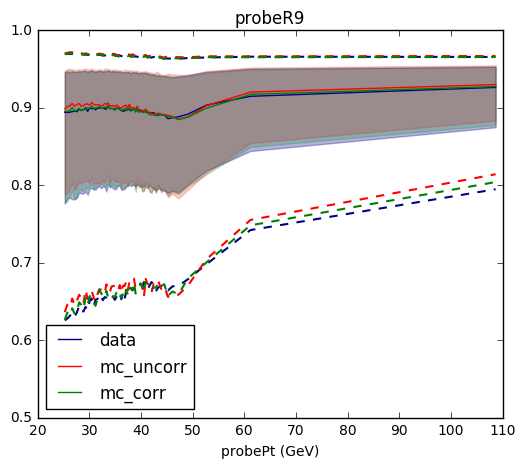

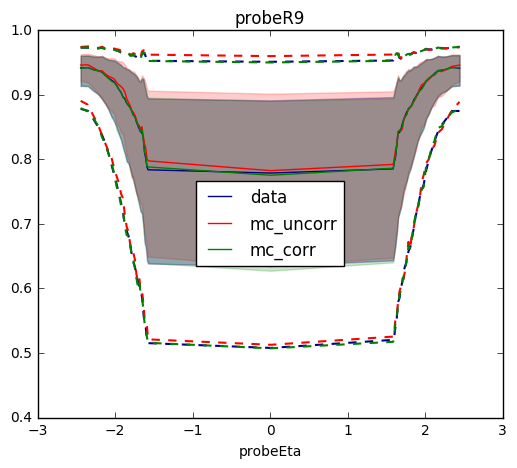

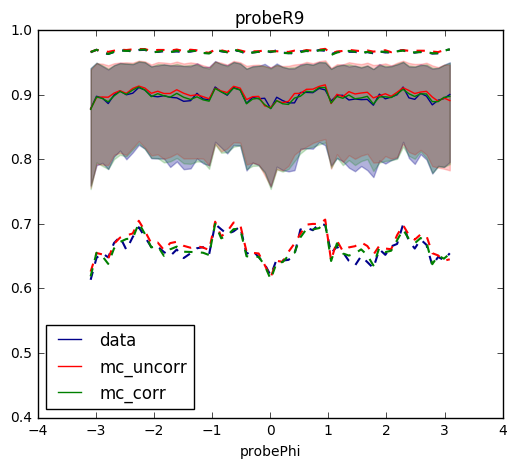

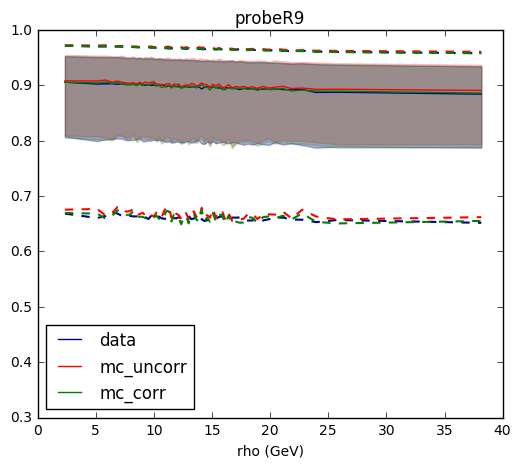

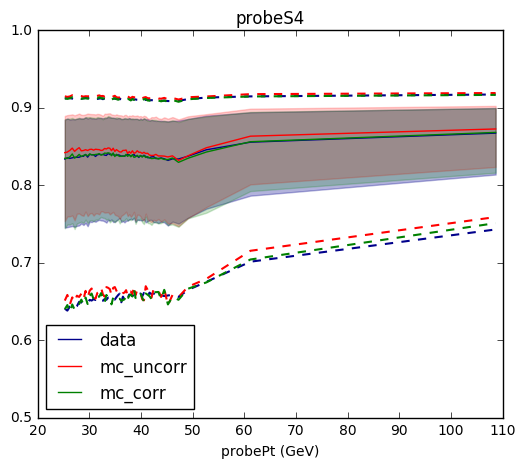

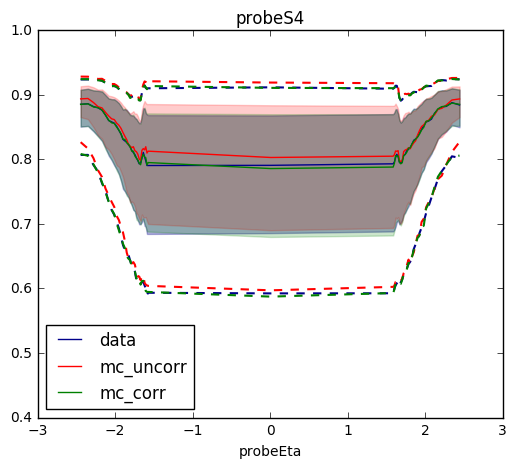

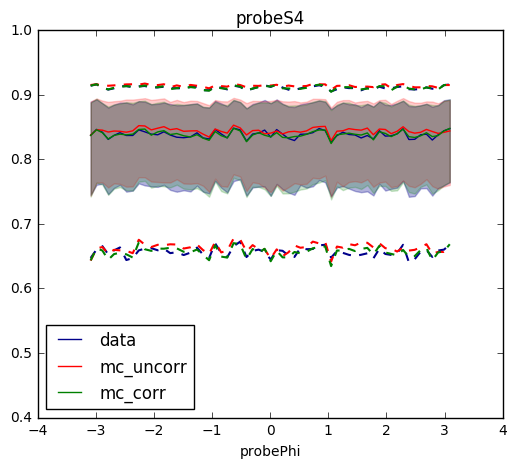

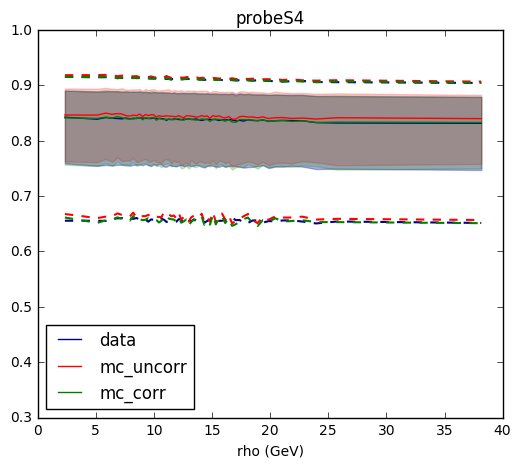

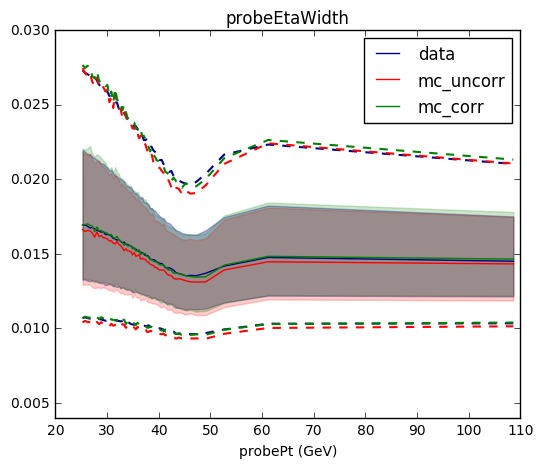

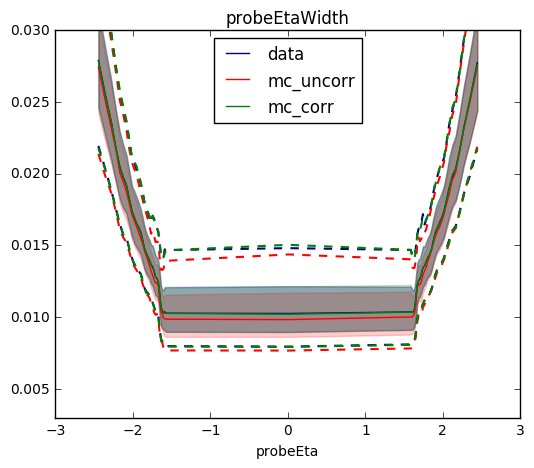

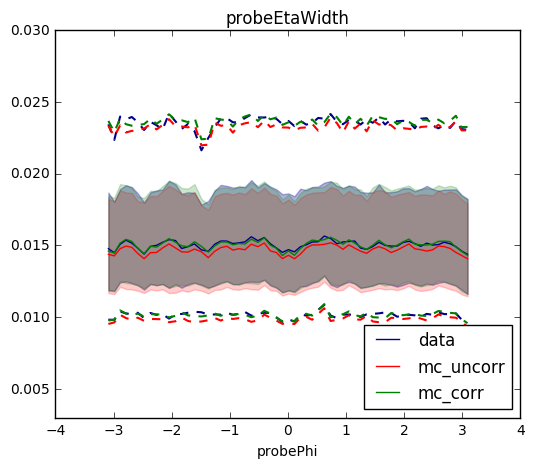

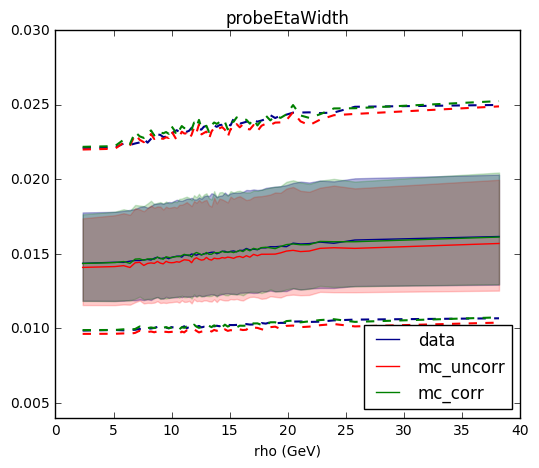

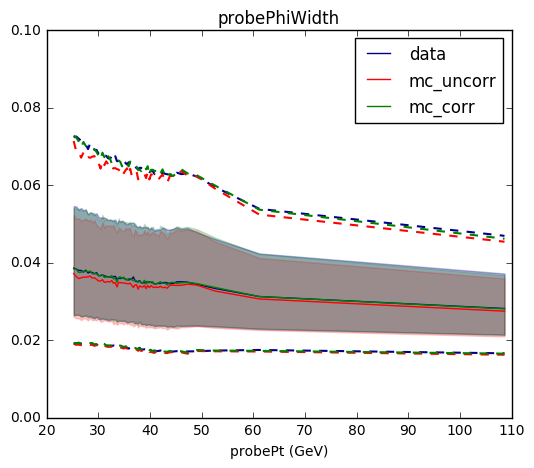

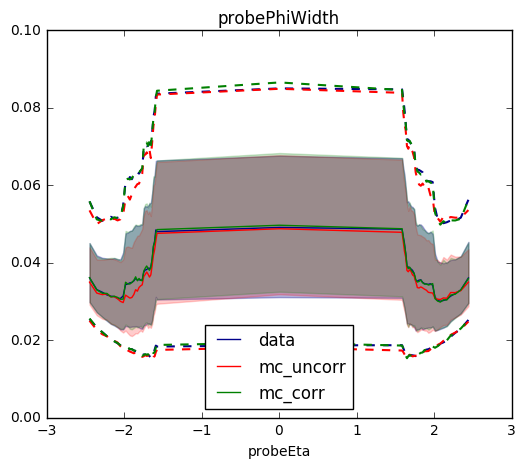

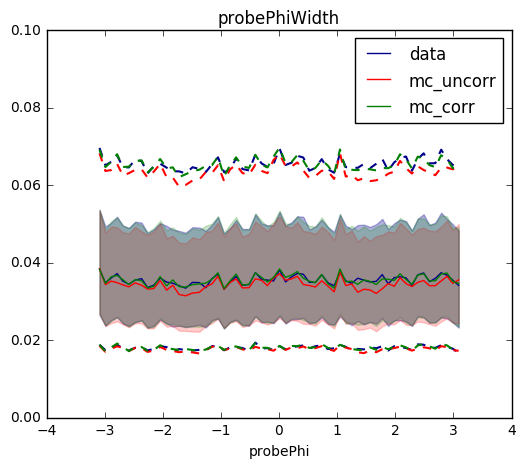

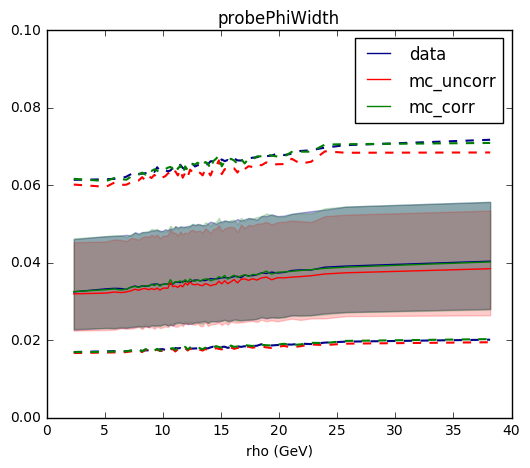

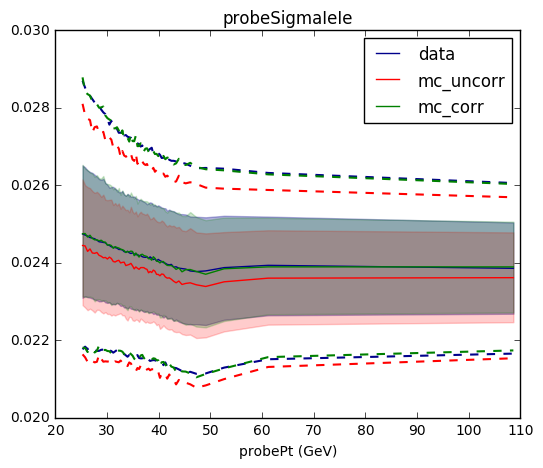

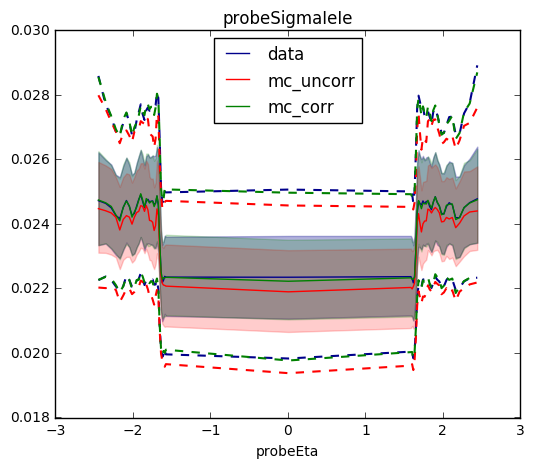

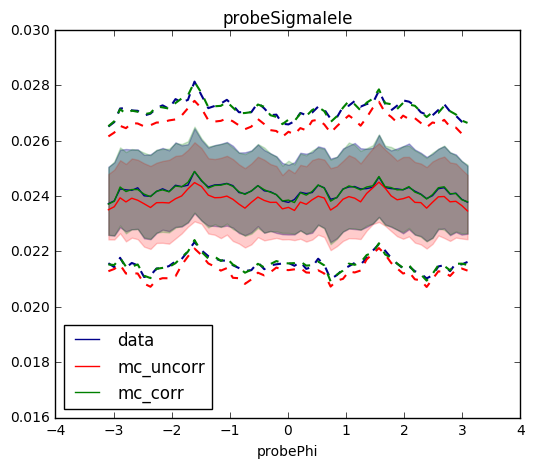

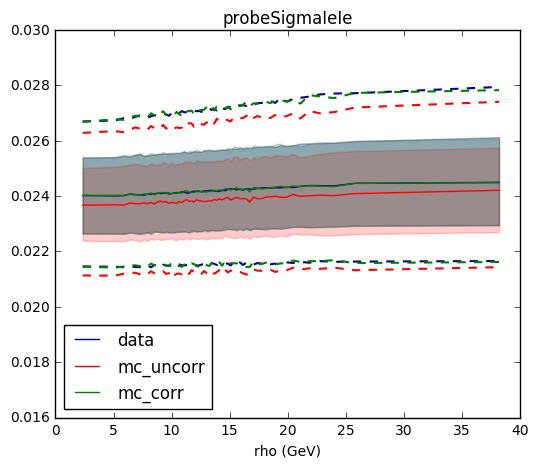

In [31]:
mk_profile(pt_mc_EE,pt_data_EE,pt_centres_EE,'probeR9',workDir+'/plots/profile_pt_probeR9_EE','probeR9',xlabel='probePt (GeV)', ylim=[.5,1], nq=nq)
mk_profile(eta_mc_EE,eta_data_EE,eta_centres_EE,'probeR9',workDir+'/plots/profile_eta_probeR9_EE','probeR9',xlabel='probeEta',ylim=[.4,1], nq=nq)
mk_profile(phi_mc_EE,phi_data_EE,phi_centres_EE,'probeR9',workDir+'/plots/profile_phi_probeR9_EE','probeR9',xlabel='probePhi',ylim=[.4,1], nq=nq)
mk_profile(rho_mc_EE,rho_data_EE,rho_centres_EE,'probeR9',workDir+'/plots/profile_rho_probeR9_EE','probeR9',xlabel='rho (GeV)',ylim=[.3,1],legloc='lower left', nq=nq)
mk_profile(pt_mc_EE,pt_data_EE,pt_centres_EE,'probeS4',workDir+'/plots/profile_pt_probeS4_EE','probeS4',xlabel='probePt (GeV)', ylim=[.5,1], nq=nq)
mk_profile(eta_mc_EE,eta_data_EE,eta_centres_EE,'probeS4',workDir+'/plots/profile_eta_probeS4_EE','probeS4',xlabel='probeEta',ylim=[.4,1], nq=nq)
mk_profile(phi_mc_EE,phi_data_EE,phi_centres_EE,'probeS4',workDir+'/plots/profile_phi_probeS4_EE','probeS4',xlabel='probePhi',ylim=[.4,1],nq=nq)
mk_profile(rho_mc_EE,rho_data_EE,rho_centres_EE,'probeS4',workDir+'/plots/profile_rho_probeS4_EE','probeS4',xlabel='rho (GeV)',ylim=[.3,1],legloc='lower left',nq=nq)
mk_profile(pt_mc_EE,pt_data_EE,pt_centres_EE,'probeEtaWidth',workDir+'/plots/profile_pt_probeEtaWidth_EE','probeEtaWidth',xlabel='probePt (GeV)', ylim=[0.004,.03],nq=nq)
mk_profile(eta_mc_EE,eta_data_EE,eta_centres_EE,'probeEtaWidth',workDir+'/plots/profile_eta_probeEtaWidth_EE','probeEtaWidth',xlabel='probeEta',ylim=[.003,.03],legloc='best',nq=nq)
mk_profile(phi_mc_EE,phi_data_EE,phi_centres_EE,'probeEtaWidth',workDir+'/plots/profile_phi_probeEtaWidth_EE','probeEtaWidth',xlabel='probePhi',ylim=[0.003,.03],legloc='lower right',nq=nq)
mk_profile(rho_mc_EE,rho_data_EE,rho_centres_EE,'probeEtaWidth',workDir+'/plots/profile_rho_probeEtaWidth_EE','probeEtaWidth',xlabel='rho (GeV)',ylim=[0.004,.03],nq=nq)
mk_profile(pt_mc_EE,pt_data_EE,pt_centres_EE,'probePhiWidth',workDir+'/plots/profile_pt_probePhiWidth_EE','probePhiWidth',xlabel='probePt (GeV)', ylim=[0,.1],nq=nq)
mk_profile(eta_mc_EE,eta_data_EE,eta_centres_EE,'probePhiWidth',workDir+'/plots/profile_eta_probePhiWidth_EE','probePhiWidth',xlabel='probeEta',ylim=[0,.1],nq=nq)
mk_profile(phi_mc_EE,phi_data_EE,phi_centres_EE,'probePhiWidth',workDir+'/plots/profile_phi_probePhiWidth_EE','probePhiWidth',xlabel='probePhi',ylim=[0,.1],nq=nq)
mk_profile(rho_mc_EE,rho_data_EE,rho_centres_EE,'probePhiWidth',workDir+'/plots/profile_rho_probePhiWidth_EE','probePhiWidth',xlabel='rho (GeV)',ylim=[0,.1],nq=nq)
mk_profile(pt_mc_EE,pt_data_EE,pt_centres_EE,'probeSigmaIeIe',workDir+'/plots/profile_pt_probeSigmaIeIe_EE','probeSigmaIeIe',xlabel='probePt (GeV)', ylim=[.02,.03],legloc='best',nq=nq)
mk_profile(eta_mc_EE,eta_data_EE,eta_centres_EE,'probeSigmaIeIe',workDir+'/plots/profile_eta_probeSigmaIeIe_EE','probeSigmaIeIe',xlabel='probeEta',ylim=[.018,.03],legloc='best',nq=nq)
mk_profile(phi_mc_EE,phi_data_EE,phi_centres_EE,'probeSigmaIeIe',workDir+'/plots/profile_phi_probeSigmaIeIe_EE','probeSigmaIeIe',xlabel='probePhi',ylim=[.016,.03],legloc='best',nq=nq)
mk_profile(rho_mc_EE,rho_data_EE,rho_centres_EE,'probeSigmaIeIe',workDir+'/plots/profile_rho_probeSigmaIeIe_EE','probeSigmaIeIe',xlabel='rho (GeV)',ylim=[.016,.03],legloc='best',nq=nq)

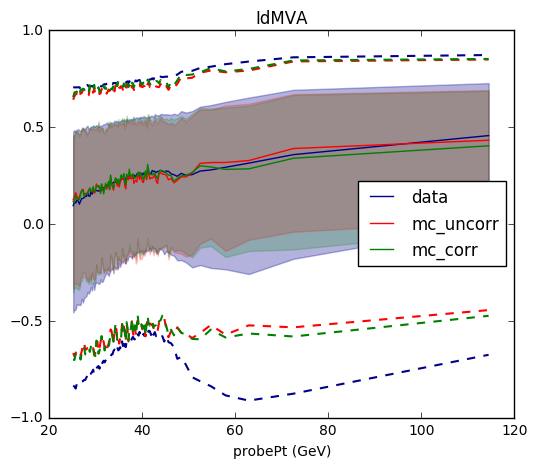

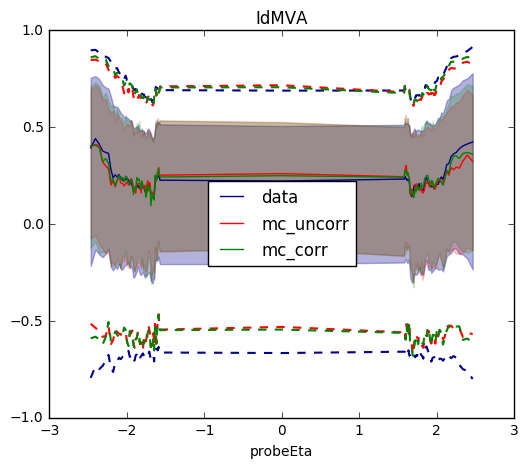

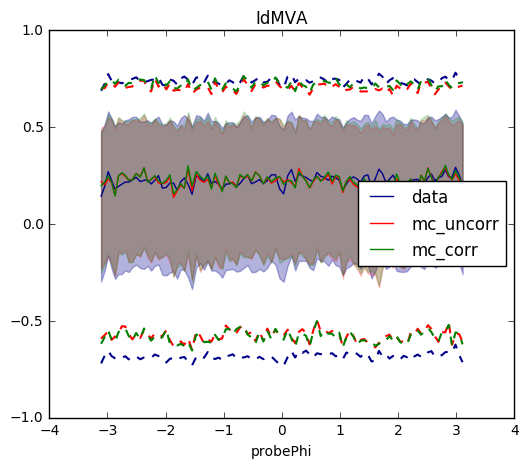

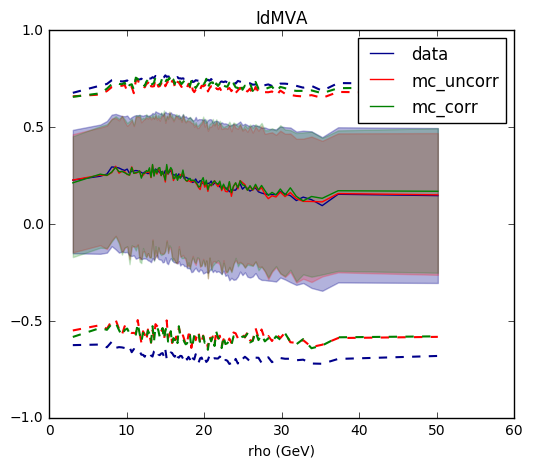

In [19]:
mk_profile(pt_mc,pt_data,pt_centres,'newPhoID',workDir+'/plots/profile_pt_IdMVA_EE_clf','IdMVA',xlabel='probePt (GeV)', ylim=[-1,1], nq=nq)
mk_profile(eta_mc,eta_data,eta_centres,'newPhoID',workDir+'/plots/profile_eta_IdMVA_EE_clf','IdMVA',xlabel='probeEta',ylim=[-1,1], nq=nq)
mk_profile(phi_mc,phi_data,phi_centres,'newPhoID',workDir+'/plots/profile_phi_IdMVA_EE_clf','IdMVA',xlabel='probePhi',ylim=[-1,1], nq=nq)
mk_profile(rho_mc,rho_data,rho_centres,'newPhoID',workDir+'/plots/profile_rho_IdMVA_EE_clf','IdMVA',xlabel='rho (GeV)',ylim=[-1,1], nq=nq)

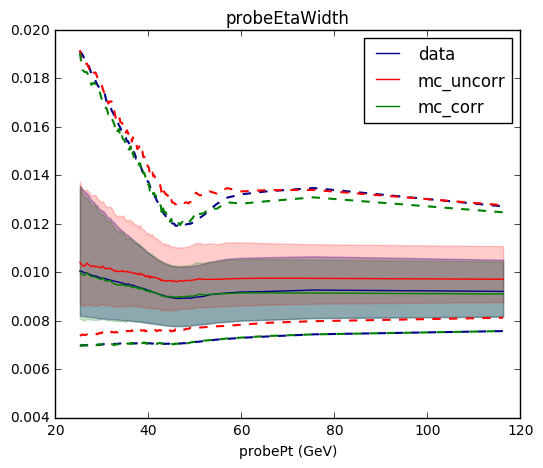

In [220]:
mk_profile(pt_mc,pt_data,pt_centres,'probeEtaWidth',workDir+'/plots/profile_pt_probeEtaWidth_EBEE','probeEtaWidth',xlabel='probePt (GeV)', ylim=[0.004,.02],nq=nq)

In [186]:
q=[.7,.5,.3,.1]
binsq=np.linspace(0,1.2,100001)
print "MC: ", wquantile(q,qr_mc.df['probeR9'].values,bins), qr_mc.df['probeR9'].quantile(q)
print (wquantile(q,qr_mc.df['probeR9'].values,bins) - qr_mc.df['probeR9'].quantile(q))/qr_mc.df['probeR9'].quantile(q)
print "data: ", wquantile(q,qr_data.df['probeR9'].values,bins), qr_data.df['probeR9'].quantile(q)
print (wquantile(q,qr_data.df['probeR9'].values,bins) - qr_data.df['probeR9'].quantile(q))/qr_data.df['probeR9'].quantile(q)
#,qr_mc.df['weight_class'].values) 

MC:  [ 0.9357315   0.89314315  0.79520302  0.61660704] 0.7    0.935742
0.5    0.893153
0.3    0.795211
0.1    0.616615
Name: probeR9, dtype: float64
0.7   -0.000012
0.5   -0.000011
0.3   -0.000010
0.1   -0.000012
Name: probeR9, dtype: float64
data:  [ 0.94281913  0.89262242  0.7846796   0.60016342] 0.7    0.942831
0.5    0.892635
0.3    0.784691
0.1    0.600176
Name: probeR9, dtype: float64
0.7   -0.000012
0.5   -0.000015
0.3   -0.000015
0.1   -0.000020
Name: probeR9, dtype: float64


In [227]:
q=[.7,.5,.3,.1]
bins=np.linspace(0,2,100001)
centres=0.5*(bins[1:]+bins[:-1])
hist, _ = np.histogram(,bins=bins,weights=gr_data['weight'])
cum_hist = np.cumsum(hist,dtype=float)
cum_hist_n = cum_hist/cum_hist[-1]
ind_high_bound = np.searchsorted(cum_hist_n,q)
ind_low_bound = ind_high_bound-1
inds=np.sort(np.ravel(np.array([ind_low_bound,ind_high_bound])))
q_val = np.interp(q,cum_hist_n[inds],centres[inds])
print q_val

ValueError: setting an array element with a sequence.

In [183]:
print inds

[47140 44630 39233 30007 47141 44631 39234 30008]


In [288]:
binsq=np.linspace(0,2,2000001)
myq = wquantile(.5,gr_data['probeR9'].get_group(pt_centres[1]), bins=binsq)#, weights=gr_mc['weight'].get_group(pt_centres[1]))
print myq, gr_data['probeR9'].get_group(pt_centres[1]).quantile(.5), (myq-gr_data['probeR9'].get_group(pt_centres[1]).quantile(.5))/gr_data['probeR9'].get_group(pt_centres[1]).quantile(.5)
#hist,_ = np.histogram(gr_data['probeR9'].get_group(pt_centres[0]), bins=binsq, weights=gr_data['weight'].get_group(pt_centres[0]))
#plt.plot(hist)

0.8633735 0.863382339478 -1.02381959126e-05


In [203]:
#qtls = percentiles(pt_data, pt_centres, 'probeR9', nq=40)
#qtls_c = np.vstack(qtls)
print np.arange(40)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [319]:
print qtls
print qtls_c[:,0]

[array([ 0.84261776,  0.66712393,  0.93819473,  0.52665623,  0.96430634]), array([ 0.86337   ,  0.70013833,  0.9424584 ,  0.5569646 ,  0.96372844]), array([ 0.88080045,  0.73073229,  0.9462077 ,  0.58787125,  0.96370788]), array([ 0.90209519,  0.76657776,  0.95073075,  0.62429346,  0.96445556]), array([ 0.9150708 ,  0.79165675,  0.95316253,  0.65185153,  0.96483974]), array([ 0.91688038,  0.80113722,  0.9530766 ,  0.663605  ,  0.96415929]), array([ 0.91734357,  0.808685  ,  0.95247864,  0.673191  ,  0.96327732]), array([ 0.91942313,  0.81622625,  0.95254023,  0.6845255 ,  0.96273493]), array([ 0.920505  ,  0.82311   ,  0.95229667,  0.692415  ,  0.96215833]), array([ 0.92271   ,  0.83208   ,  0.952215  ,  0.705491  ,  0.96170414]), array([ 0.9255225 ,  0.84030875,  0.95237563,  0.7198925 ,  0.96131556]), array([ 0.92899667,  0.85421   ,  0.952445  ,  0.746334  ,  0.96075245])]
[ 0.84261776  0.86337     0.88080045  0.90209519  0.9150708   0.91688038
  0.91734357  0.91942313  0.920505    

In [146]:
eta_centres = np.delete(eta_centres,3)
print eta_centres
#q_eta_mc = percentiles(eta_mc, eta_centres, 'probeR9')
#print q_eta_mc, eta_centres
#eta_centres = np.array_split(eta_centres,2)
#print eta_centres
#q_eta_mc = np.split(q_eta_mc,q_eta_mc.shape[0]/3,axis=0)
#q_eta_mc = np.vstack(q_eta_mc)
#print q_eta_mc[0]

[-2.375  -2.125  -1.7221  1.7221  2.125   2.375 ]


In [21]:
mc_c_quantiles = percentiles(pt_mc,pt_centres,'newPhoID'+'corrShowerShapes','weight',nq=100)
mc_quantiles = percentiles(pt_mc,pt_centres,'newPhoID','weight',nq=100)
data_quantiles = percentiles(pt_data,pt_centres,'newPhoID',nq=100)

In [24]:
print np.average((mc_c_quantiles - mc_quantiles)/mc_quantiles)
print '----------------------------------------------------------------------'
print np.average((mc_c_quantiles - data_quantiles)/data_quantiles)

-0.131639187142
--------------------------------------------------
1.0325331765


In [33]:
qr_data_EB.df.to_hdf(workDir+'/df_data_EB_kinSS_corr.h5','df',mode='w',format='t')
qr_data_EE.df.to_hdf(workDir+'/df_data_EE_kinSS_corr.h5','df',mode='w',format='t')
qr_mc_EB.df.to_hdf(workDir+'/df_mc_EB_kinSS_corr.h5','df',mode='w',format='t')
qr_mc_EE.df.to_hdf(workDir+'/df_mc_EE_kinSS_corr.h5','df',mode='w',format='t')